In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./data/metacritic.csv')

In [29]:
df['metascore'] = df['metascore'].apply(lambda x: float(x))
df['userscore'] = df['userscore'].apply(lambda x: float(x) if x!='tbd' else 0)
m_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, \
          'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['month'] = df['release_date'].apply(lambda x: x.split(',')[0].split(' ')[0]).map(m_dict)
df['day'] = df['release_date'].apply(lambda x: int(x.split(',')[0].split(' ')[2]) if '  ' in x else int(x.split(',')[0].split(' ')[1]))
df['year'] = df['release_date'].apply(lambda x: int(x.split(', ')[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
title           210 non-null object
platform        210 non-null object
metascore       210 non-null float64
userscore       210 non-null float64
release_date    210 non-null object
month           210 non-null int64
day             210 non-null int64
year            210 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 13.2+ KB


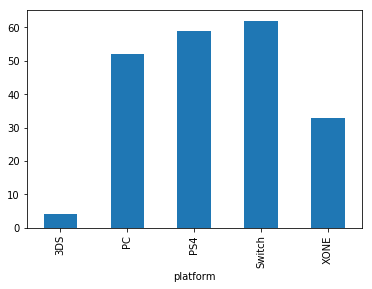

In [56]:
df.groupby(['platform']).count()['title'].plot.bar()
plt.savefig('./figures/metacritic/numTitlesByPlatforms.png', bbox_inches='tight')

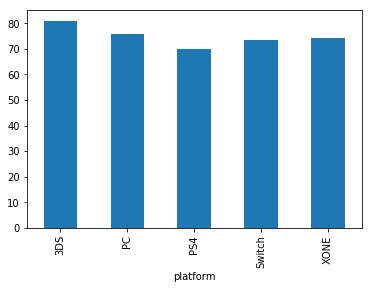

In [57]:
df.groupby(['platform']).mean()['metascore'].plot.bar()
plt.savefig('./figures/metacritic/averageMetascoreByPlatform.png', bbox_inches='tight')

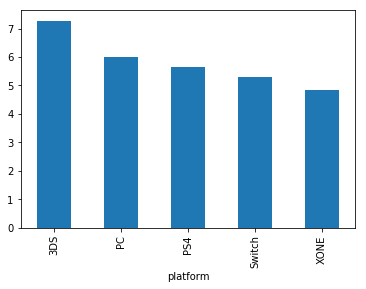

In [58]:
df.groupby(['platform']).mean()['userscore'].plot.bar()
plt.savefig('./figures/metacritic/averageUserscoreByPlatforms.png', bbox_inches='tight')

In [45]:
def meta_verdict(x):
    if x >= 90:
        return 'Very good'
    elif x >= 75:
        return 'Good'
    elif x >= 50:
        return 'Average'
    elif x >= 20:
        return 'Bad'
    elif x >= 1:
        return 'Very bad'
    else:
        return 'None'
    
df['metascore_verdict'] = df['metascore'].apply(verbalise)
df['userscore_verdict'] = df['userscore'].apply(lambda x: verbalise(x*10))

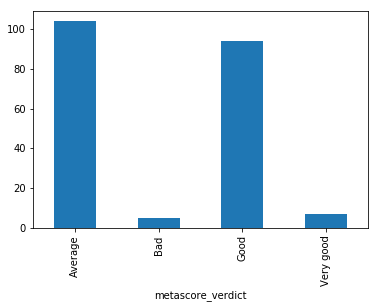

In [59]:
df.groupby(['metascore_verdict']).count()['title'].plot.bar()
plt.savefig('./figures/metacritic/numTitlesByMetaVerdict.png', bbox_inches='tight')

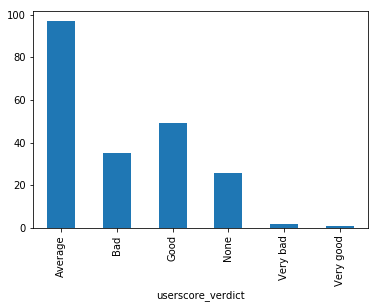

In [60]:
df.groupby(['userscore_verdict']).count()['title'].plot.bar()
plt.savefig('./figures/metacritic/numTitlesByUserVerdict.png', bbox_inches='tight')